# PCA

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Data 불러오기
## 40명의 10장씩 사진 (112,92) => (40,10,112*92)로

In [2]:
subject=[]
ori_subject=[]
for i in range(1,41):
  path = './att_faces/s'+str(i)
  file_list = os.listdir(path)
  line=[]
  line_1=[]
  for j in range(10):
    with Image.open(path+"/"+file_list[j]) as im:
      a = np.asarray(im)
      line.append(a)
      
      a_1=a.reshape(112*92,)
      line_1.append(a_1)
  ori_subject.append(line)
  subject.append(line_1)

subject=np.asarray(subject)
ori_subject = np.asarray(ori_subject)

In [3]:
subject.shape

(40, 10, 10304)

In [33]:
# train, test 나누기 (train:36명, test:4명)

In [34]:

###random 추출

train=[]
ori_train=[]
test=[]
ori_test=[]

ran_list = []
train_index=[]

for i in range(40):
  ran_list.append(i)
test_index = random.sample(ran_list,4)

for i in range(4):
  test.append(subject[test_index[i]])
test=np.asarray(test)
test= test.reshape(4*10,10304)
ori_test = test.reshape(40,112,92)


for i in range(40):
  is_test=False
  for j in test_index:
    
    if i == j:
      is_test=True
      continue
  if is_test == True:
    continue
  train_index.append(i)
  train.append(subject[i])
  #print('trian index = ', i )
train=np.asarray(train)
train = train.reshape(36*10, 10304)
ori_train=train.reshape(360,112,92)

print('train index : ',train_index)
print('test index : ', test_index)
print('\n train : \n',train, '\n shape: \n ',train.shape)
print('\n test: \n',test, '\n shape: \n', test.shape)

train index :  [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39]
test index :  [8, 23, 37, 16]

 train : 
 [[ 48  49  45 ...  47  46  46]
 [ 34  34  33 ...  37  40  33]
 [ 60  60  62 ...  32  34  34]
 ...
 [129 127 133 ...  93  93  93]
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]] 
 shape: 
  (360, 10304)

 test: 
 [[105 102 106 ...  72  62  75]
 [111 111 110 ...  88  79  90]
 [100 110 107 ...  64  71  59]
 ...
 [ 52  41  48 ...  44  43  46]
 [ 48  45  50 ...  46  50  53]
 [ 45  52  48 ...  48  43  47]] 
 shape: 
 (40, 10304)


# sklearn의 PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=10)

In [37]:
pca.fit(train)

PCA(n_components=10)

In [38]:
test_reduced = pca.fit_transform(test)
test_reduced.shape

(40, 10)

In [39]:
test_recovered = pca.inverse_transform(test_reduced)
test_recovered.shape

(40, 10304)

In [40]:
test_recovered = test_recovered.reshape((40,112,92),)
test_recovered.shape

(40, 112, 92)

In [5]:
def plot_test(test, people, m):
    fig, axes=plt.subplots(people,m)
    for i in range(people*m):
        for image, ax in zip(test.astype(np.float32), axes.ravel()):
            ax.imshow(image)
    plt.show

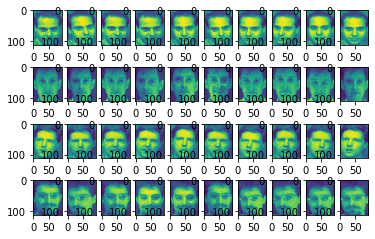

In [42]:
plot_test(ori_test,4,10)

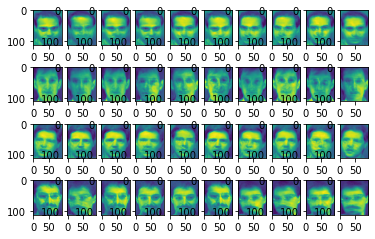

In [43]:
plot_test(test_recovered,4,10)

# PCA

In [4]:
class PrincipalComponentAnalysis():

    
    def __init__(self):
        # eigen vector matrix
        self.eigen_mat = None
        # eigen value matrix (후에 크기별로 정렬할때 필요)
        self.eigen_val = None
        # n_components 만큼
        self.reduced_eigen_mat = None
        
    def fit(self, x):
        # data를 zero centered
        x = x - np.mean(x, axis=0, keepdims=True)
        
        n, d = x.shape
        cov = np.matmul(x.T, x)/n
        
        eigvals, eigvecs = np.linalg.eig(cov)
        eig_pairs = [(eigvals[i], eigvecs[:, i]) for i in range(d)]
        sorted_eig = sorted(eig_pairs, key=lambda tup: tup[0], reverse=True)
        
        self.eigen_mat = np.stack(list(map(lambda tup: tup[1], sorted_eig)), axis=1)
        self.eigen_val = np.array(list(map(lambda tup: tup[0], sorted_eig)))
        
    def transform(self, x, n_components):
        
        x = x - np.mean(x, axis=0, keepdims=True)
        
        self.reduced_eigen_mat = self.eigen_mat[:, :n_components]
        
        results = np.matmul(x, self.reduced_eigen_mat)
        
        return results
    
    def reconstruct(self, data, x_transformed) :
        y = np.matmul(x_transformed, self.reduced_eigen_mat.T)+np.mean(data, axis=0, keepdims=True)
        y = y.reshape(y.shape[0],112,92)

        return y

### n_components = 10

In [5]:
pca = PrincipalComponentAnalysis()

In [46]:
pca.fit(train)

In [47]:
test_transformed = pca.transform(test, 10)
print(test_transformed,test_transformed.shape)

[[-3.00541988e+02+0.j -7.84478534e+00+0.j  7.40629370e+02+0.j
   4.09015470e+02+0.j -4.45334099e+02+0.j -3.46597475e+02+0.j
  -7.16590221e+01+0.j -1.16372228e+03+0.j -4.71627597e+02+0.j
   6.06050881e+01+0.j]
 [ 4.17929910e+02+0.j -5.69099908e+02+0.j  8.79084600e+02+0.j
   7.84784745e+02+0.j  4.44021108e+02+0.j -9.76504106e+02+0.j
  -2.66391096e+02+0.j -2.54067327e+02+0.j -5.76814862e+02+0.j
  -1.68441657e+02+0.j]
 [-4.40365048e+01+0.j -2.78072319e+01+0.j  6.79888947e+02+0.j
   6.10223111e+02+0.j -8.67688551e+02+0.j -7.50762278e+02+0.j
  -1.49650438e+02+0.j -9.66212113e+02+0.j -2.05669221e+02+0.j
  -3.80254659e+02+0.j]
 [-8.49748234e+01+0.j  1.67761999e+02+0.j  7.26009710e+02+0.j
   4.45996479e+02+0.j -3.33109029e+02+0.j -6.38566287e+02+0.j
  -1.03973446e+01+0.j -1.11413713e+03+0.j -4.76372943e+02+0.j
   9.97078519e+01+0.j]
 [ 2.09717515e+02+0.j -3.69025464e+02+0.j  5.05577766e+02+0.j
   6.91805179e+02+0.j -4.87301013e+02+0.j -6.33487610e+02+0.j
  -4.65504778e+01+0.j -1.69675207e+02+0.

In [48]:
print(pca.reduced_eigen_mat,pca.reduced_eigen_mat.shape)

[[-1.07788174e-03+0.j -1.58477617e-02+0.j  1.37620448e-02+0.j ...
  -1.82864489e-03+0.j  2.57857032e-05+0.j -8.07906530e-04+0.j]
 [-1.03792383e-03+0.j -1.57616683e-02+0.j  1.39048481e-02+0.j ...
  -1.53925132e-03+0.j  4.51974721e-04+0.j -8.78316297e-04+0.j]
 [-1.05131558e-03+0.j -1.57423633e-02+0.j  1.37617246e-02+0.j ...
  -1.52013425e-03+0.j  3.19177454e-04+0.j -1.11846507e-03+0.j]
 ...
 [-8.70945183e-03+0.j  9.18225549e-03+0.j  1.71927551e-02+0.j ...
   1.94685015e-02+0.j -1.62086661e-02+0.j  2.05811191e-02+0.j]
 [-8.23356092e-03+0.j  8.31178677e-03+0.j  1.68068805e-02+0.j ...
   1.80500649e-02+0.j -1.62406460e-02+0.j  2.08392673e-02+0.j]
 [-9.14308743e-03+0.j  7.27015899e-03+0.j  1.71232111e-02+0.j ...
   1.74733271e-02+0.j -1.45872073e-02+0.j  1.90968612e-02+0.j]] (10304, 10)


### Eigen Face

In [49]:
eigen_face=pca.reduced_eigen_mat.T.reshape(10,112,92)
eigen_face.shape

(10, 112, 92)

<ipython-input-50-5fc596ab93c5>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(eigen_face.astype(np.float32),2,5)


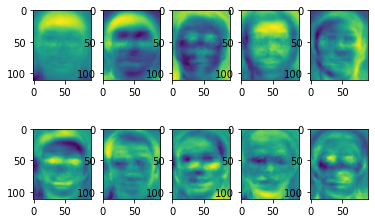

In [50]:
plot_test(eigen_face.astype(np.float32),2,5)

In [51]:
test_reconstruct = pca.reconstruct(test,test_transformed)

In [52]:
print(test_reconstruct, test_reconstruct.shape)

[[[100.52589672+0.j 101.48874504+0.j 102.21962445+0.j ...
    95.22668425+0.j  96.07174424+0.j  95.6478031 +0.j]
  [100.96554055+0.j 102.72624544+0.j 102.68312689+0.j ...
    95.48309293+0.j  94.89677089+0.j  95.87465362+0.j]
  [101.33977326+0.j 102.26685635+0.j 102.31817198+0.j ...
    96.96326947+0.j  94.98822264+0.j  95.15529495+0.j]
  ...
  [124.46457458+0.j 127.4826005 +0.j 127.92742273+0.j ...
    59.42753993+0.j  60.99823612+0.j  59.53375449+0.j]
  [135.15908046+0.j 133.72595914+0.j 139.31056865+0.j ...
    61.52654944+0.j  60.5129451 +0.j  61.71384618+0.j]
  [143.16923464+0.j 142.42747208+0.j 146.96786247+0.j ...
    63.5821691 +0.j  59.32856861+0.j  59.67918237+0.j]]

 [[100.08668356+0.j 101.56721825+0.j 102.26298298+0.j ...
   101.97343266+0.j 102.28779652+0.j 102.28121706+0.j]
  [100.56201162+0.j 102.46804644+0.j 102.50959037+0.j ...
   102.54472373+0.j 102.28579487+0.j 102.70774524+0.j]
  [101.15401731+0.j 102.0686004 +0.j 102.22072201+0.j ...
   103.4256622 +0.j 102.016828

In [53]:
print('test_reconstruct.shape : ',test_reconstruct.shape)
print('test_shape : ', ori_test.shape)

test_reconstruct.shape :  (40, 112, 92)
test_shape :  (40, 112, 92)


### 원래 test image

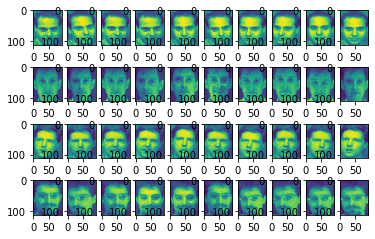

In [54]:
plot_test(ori_test.astype(np.float32),4,10)

### reconstruct 후 test image

<ipython-input-55-48af3bb30cdc>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(test_reconstruct.astype(np.float32), 4, 10)


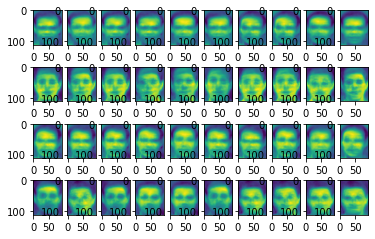

In [55]:
plot_test(test_reconstruct.astype(np.float32), 4, 10)

# gallery, query로나누기

In [6]:
def split_gallery_query(test_transformed):
    test_transformed = test_transformed.reshape(4,10,test_transformed.shape[1])
    #print('test transformed shape : ', test_transformed.shape)
    gallery_trans=[]
    query_trans=[]
    for i in range(4):
        #gallery_trans.append(i+1)
        for j in range(10):
            if j < 7:
                gallery_trans.append(test_transformed[i][j])
            else :
                query_trans.append(test_transformed[i][j])

    gallery_trans=np.asarray(gallery_trans)
    query_trans=np.asarray(query_trans)
    #print('gallery : \n',gallery_trans,'\n gallery shape : \n', gallery_trans.shape)
    #print('query : \n',query_trans,'\n query shape : \n', query_trans.shape)
    return gallery_trans, query_trans

In [57]:
gallery_trans, query_trans = split_gallery_query(test_transformed)

# gallery query scatter

In [7]:
def scatter(gallery_trans, query_trans):
    plt.figure(figsize=(8, 8), dpi=120)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    x=gallery_trans[:,0].astype(np.float32)
    y=gallery_trans[:,1].astype(np.float32)
    z=gallery_trans[:,2].astype(np.float32)

    x1=query_trans[:,0].astype(np.float32)
    y1=query_trans[:,1].astype(np.float32)
    z1=query_trans[:,2].astype(np.float32)

    ax.scatter(x,y,z)
    ax.scatter(x1,y1,z1, c='red')

    plt.show()

<ipython-input-58-31d0ce06c5c7>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  x=gallery_trans[:,0].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  y=gallery_trans[:,1].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  z=gallery_trans[:,2].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  x1=query_trans[:,0].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  y1=query_trans[:,1].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  z1=query_trans[:,2].astype(np.float32)


<Figure size 960x960 with 0 Axes>

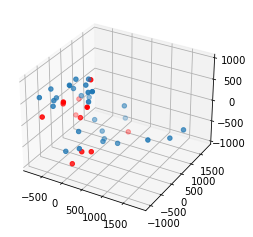

In [59]:
scatter(gallery_trans, query_trans)

# knn으로 뿌려서 정확도 계산

In [8]:
def knn_accuracy(gallery_trans, query_trans, knn_num):
    gallery_trans = gallery_trans.reshape(1,28,gallery_trans.shape[1])
    query_trans = query_trans.reshape(12,1,query_trans.shape[1])

    # query gallery 거리 찾기
    distance = np.sum(np.square(query_trans-gallery_trans),axis=-1)
    #print(distance, distance.shape)

    # sorting하여 가까운 사진 index로 정렬
    sort_distance = np.argsort(distance, axis=1).reshape(4,3,28)
    #print(sort_distance, sort_distance.shape)

    # knn 10개
    knn = sort_distance[:,:,:knn_num]//7
    #print(knn, knn.shape)
    knn = knn.reshape(12,knn_num)


    # count[0] = 1번 사람이라고 예측한 수
    count = []

    for row in knn:
        # knn행별로 사람 플러스 해줄 임시 배열
        temp = [0 for i in range(4)]
        for j in range(knn_num):
            temp[row[j]]+=1
        count.append(temp)
    count=np.asarray(count).reshape(4,3,4)
    #print(count, count.shape)

    # 정확도
    accuracy = (np.sum(count, axis=1)/(3*knn_num))*100
    
    accuracy = pd.DataFrame(accuracy, columns=['1','2','3','4'], index=['1','2','3','4'])

    
    return accuracy

In [61]:
accuracy = knn_accuracy(gallery_trans, query_trans, 7)
accuracy_n_10 = np.trace(accuracy)/4

In [62]:
accuracy

,1,2,3,4
1,61.904762,0.000000,38.095238,0.000000
2,0.000000,90.476190,0.000000,9.523810
3,23.809524,0.000000,76.190476,0.000000
4,0.000000,47.619048,0.000000,52.380952


In [63]:
accuracy_n_10

70.23809523809524

## n_components = 50

In [91]:
test_transformed_50 = pca.transform(test,50)

In [92]:
reduced_eigen_mat_50 = pca.reduced_eigen_mat
reduced_eigen_mat_50.shape


(10304, 50)

In [93]:
print(test_transformed_50,test_transformed_50.shape)

[[-300.5419881 +0.j   -7.84478534+0.j  740.62936988+0.j ...
    27.56161796+0.j  196.90803906+0.j   26.85104838+0.j]
 [ 417.92990971+0.j -569.09990827+0.j  879.08460006+0.j ...
   235.16839867+0.j -116.44172681+0.j   57.322557  +0.j]
 [ -44.03650484+0.j  -27.80723193+0.j  679.88894721+0.j ...
   261.76216423+0.j  166.73239946+0.j  133.06677778+0.j]
 ...
 [ 487.52120846+0.j -772.79914717+0.j -393.45238072+0.j ...
   -53.48112826+0.j   89.11552714+0.j  -48.723127  +0.j]
 [ 124.81110027+0.j -970.21410162+0.j -694.09835209+0.j ...
   167.30688576+0.j  239.69365159+0.j -122.10357522+0.j]
 [ 291.99299915+0.j -840.40525506+0.j -419.61884535+0.j ...
    58.9415495 +0.j  177.98232493+0.j -124.32181891+0.j]] (40, 50)


### Eigen Face

<ipython-input-94-9be997860aa5>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(eigen_face_50.astype(np.float32),5,10)


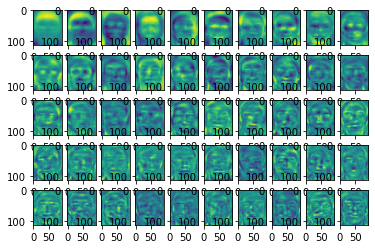

In [94]:
eigen_face_50=reduced_eigen_mat_50.T.reshape(50,112,92)
plot_test(eigen_face_50.astype(np.float32),5,10)

In [95]:
test_reconstruct_50 = pca.reconstruct(test, test_transformed_50)

### reconstruct 후 test image

<ipython-input-96-941aa1fa1d42>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(test_reconstruct_50.astype(np.float32), 4, 10)


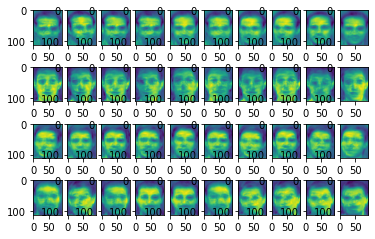

In [96]:
plot_test(test_reconstruct_50.astype(np.float32), 4, 10)

In [97]:
gallery_trans_50, query_trans_50 = split_gallery_query(test_transformed_50)

<ipython-input-58-31d0ce06c5c7>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  x=gallery_trans[:,0].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  y=gallery_trans[:,1].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  z=gallery_trans[:,2].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  x1=query_trans[:,0].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  y1=query_trans[:,1].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  z1=query_trans[:,2].astype(np.float32)


<Figure size 960x960 with 0 Axes>

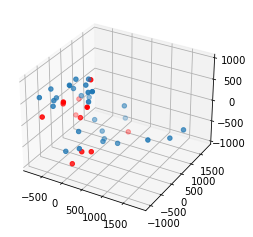

In [98]:
scatter(gallery_trans_50, query_trans_50)

In [72]:
accuracy_50 = knn_accuracy(gallery_trans_50, query_trans_50, 7)
accuracy_n_50 = np.trace(accuracy_50)/4

In [89]:
accuracy_n_50

77.38095238095238

## n_components = 3

In [73]:
test_transformed_3 = pca.transform(test,3)

In [74]:
reduced_eigen_mat_3 = pca.reduced_eigen_mat        

In [75]:
reduced_eigen_mat_3.shape

(10304, 3)

<ipython-input-90-4d52b10d8cba>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(eigen_face_3.astype(np.float32),1,3)


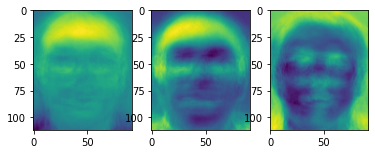

In [90]:
eigen_face_3=reduced_eigen_mat_3.T.reshape(3,112,92)
plot_test(eigen_face_3.astype(np.float32),1,3)

In [77]:
test_reconstruct_3 = pca.reconstruct(test, test_transformed_3)

<ipython-input-78-4f0383d11f85>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(test_reconstruct_3.astype(np.float32), 4, 10)


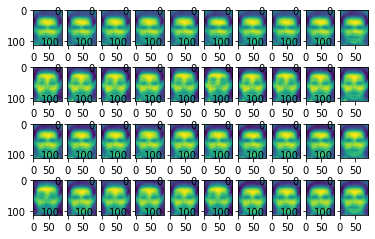

In [78]:
plot_test(test_reconstruct_3.astype(np.float32), 4, 10)

In [79]:
gallery_trans_3, query_trans_3 = split_gallery_query(test_transformed_3)

<ipython-input-58-31d0ce06c5c7>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  x=gallery_trans[:,0].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  y=gallery_trans[:,1].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  z=gallery_trans[:,2].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  x1=query_trans[:,0].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  y1=query_trans[:,1].astype(np.float32)
<ipython-input-58-31d0ce06c5c7>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  z1=query_trans[:,2].astype(np.float32)


<Figure size 960x960 with 0 Axes>

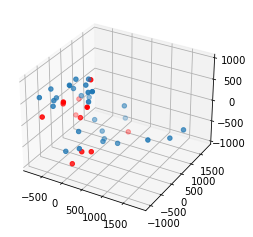

In [80]:
scatter(gallery_trans_3,query_trans_3)

In [81]:
accuracy_3 = knn_accuracy(gallery_trans_3, query_trans_3, 7)
accuracy_n_3 = np.trace(accuracy_3)/4

# origin image, n_comp = 3, n_comp = 10, n_comp = 50 비교

### origin

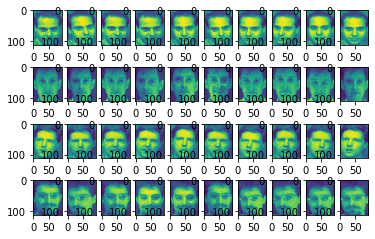

In [82]:
plot_test(ori_test.astype(np.float32),4,10)

### n_components = 3

<ipython-input-83-4f0383d11f85>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(test_reconstruct_3.astype(np.float32), 4, 10)


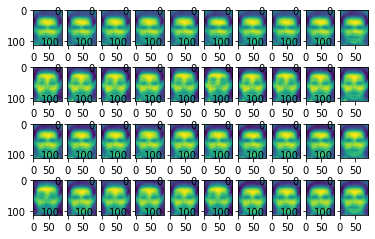

In [83]:
plot_test(test_reconstruct_3.astype(np.float32), 4, 10)

### n_components = 10

<ipython-input-84-48af3bb30cdc>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(test_reconstruct.astype(np.float32), 4, 10)


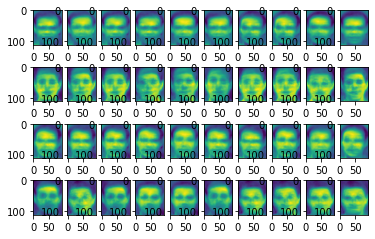

In [84]:
plot_test(test_reconstruct.astype(np.float32), 4, 10)

### n_components= 50

<ipython-input-85-941aa1fa1d42>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(test_reconstruct_50.astype(np.float32), 4, 10)


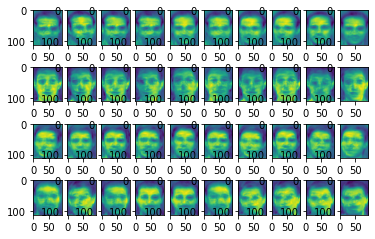

In [85]:
plot_test(test_reconstruct_50.astype(np.float32), 4, 10)

# n_components = 3, 10, 50 에 따른 정확도 비교

In [86]:
print('n_components=3 일때 정확도 : ', accuracy_n_3)

n_components=3 일때 정확도 :  69.04761904761904


In [87]:
print('n_components=10 일때 정확도 : ', accuracy_n_10)

n_components=10 일때 정확도 :  70.23809523809524


In [88]:
print('n_components=50 일때 정확도 : ', accuracy_n_50)

n_components=50 일때 정확도 :  77.38095238095238


# 10-Fold

In [9]:
truncatedSubject = np.split(subject, 10, axis=0)
truncatedSubject=np.asarray(truncatedSubject)

In [10]:
accuracy = []
for i in range (10):
    print(i+1,'실행')
    test = truncatedSubject[i].reshape(40,10304)
    
    train=[]
    for j in range(10):
        if i!=j:
            train.append(truncatedSubject[j])
    train=np.asarray(train).reshape(36*10,10304)
    
    #fit
    pca.fit(train)
    print(i+1,'번째 fit 완료')
    
    # transform
    test_transformed=pca.transform(test,10)
    
    # query gallery 나누기
    gallery_trans, query_trans = split_gallery_query(test_transformed)
    
    

    accuracy.append(knn_accuracy(gallery_trans, query_trans, 7))
    print(accuracy[i])

1 실행
1 번째 fit 완료
           1           2          3          4
1  76.190476   14.285714   9.523810   0.000000
2   0.000000  100.000000   0.000000   0.000000
3   0.000000    0.000000  52.380952  47.619048
4   0.000000    0.000000  38.095238  61.904762
2 실행
2 번째 fit 완료
       1      2      3      4
1  100.0    0.0    0.0    0.0
2    0.0  100.0    0.0    0.0
3    0.0    0.0  100.0    0.0
4    0.0    0.0    0.0  100.0
3 실행
3 번째 fit 완료
            1         2          3      4
1  100.000000   0.00000   0.000000    0.0
2    4.761905  90.47619   4.761905    0.0
3   14.285714   0.00000  85.714286    0.0
4    0.000000   0.00000   0.000000  100.0
4 실행
4 번째 fit 완료
           1         2          3          4
1  95.238095   0.00000   0.000000   4.761905
2   0.000000  90.47619   4.761905   4.761905
3   0.000000   0.00000  85.714286  14.285714
4   0.000000   0.00000  52.380952  47.619048
5 실행
5 번째 fit 완료
           1      2         3          4
1  80.952381    0.0   0.00000  19.047619
2   0.000000 

In [11]:
accuracy_all = pd.DataFrame(np.sum(accuracy, axis=0)/10, columns=['1','2','3','4'], index=['1','2','3','4'])
accuracy_all

,1,2,3,4
1,88.571429,5.714286,1.428571,4.285714
2,1.428571,95.238095,1.428571,1.904762
3,8.571429,6.190476,75.238095,10.000000
4,2.380952,2.380952,11.904762,83.333333


In [12]:
np.trace(accuracy_all)/4

85.5952380952381

# PCA 정확도 : 85.60 %